In [54]:
import numpy as np
import pandas as pd
import tonal_model
import sys
import random
from glob import glob

def emergent_dissonance(diss12, diss1, diss2):
    if ((not diss12) | (not diss1) | (not diss2)):
        return None
    return diss12 - (diss1+diss2)/2


def emergent_dissonance2(diss12, diss1, diss2):
    if ((not diss12) | (not diss1) | (not diss2)):
        return None
    return diss12 - (diss1+diss2)

# From chance

In [55]:
# FROM CHANCE
def random_pitches():
    pc = []
    for i in range(12):
        pc.append(random.randint(0,100))
    return pc

def random_emergent_diss():
    pc1 = random_pitches()
    pc2 = random_pitches()
    pc12 = [pc1[i]+pc2[i] for i in range(12)]
    diss1 = tonal_model.get_weighted_avg_dist(pc1)
    diss2 = tonal_model.get_weighted_avg_dist(pc2)
    diss12 = tonal_model.get_weighted_avg_dist(pc12)
    return (emergent_dissonance(diss12,diss1,diss2), emergent_dissonance2(diss12,diss1,diss2))

In [56]:
emerge_diss = []
emerge_diss2 = []
for i in range(3000):
    random_diss = random_emergent_diss()
    emerge_diss.append(random_diss[0])
    emerge_diss2.append(random_diss[1])

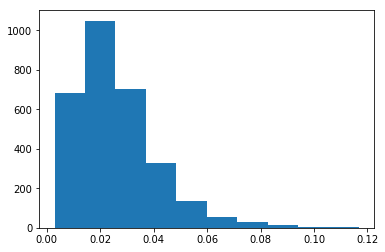

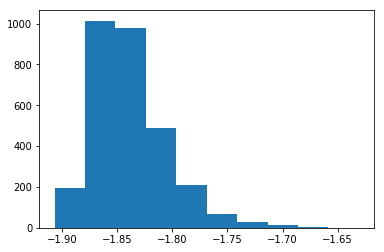

0.026077716932350073
-1.8382414547044204


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(emerge_diss)
plt.show()
plt.hist(emerge_diss2)
plt.show()

print(np.mean(emerge_diss))
print(np.mean(emerge_diss2))

# Surrogate Pairs

In [50]:
# FROM SURROGATE PAIRS
def surrogate_emergent_diss(pc1_path, pc2_path):
    pc1 = pd.read_csv(pc1_path)
    pc2 = pd.read_csv(pc2_path)
    emergent_diss = pd.DataFrame()
    for w in np.unique(pc1['window']):
        pc1_w = pc1.loc[pc1['window']==w]
        pc2_w = pc2.loc[pc2['window']==w]
        min_length = min(len(pc1_w),len(pc2_w))
        for i in range(min_length):
            pc1_vals = pc1_w.iloc[i,1:13].values
            diss1 = tonal_model.get_weighted_avg_dist(pc1_vals)
            pc2_vals = pc2_w.iloc[i,1:13].values
            diss2 = tonal_model.get_weighted_avg_dist(pc2_vals)
            pc12_vals = [pc1_vals[i]+pc2_vals[i] for i in range(12)]
            diss12 = tonal_model.get_weighted_avg_dist(pc12_vals)
            diss_emerge = emergent_dissonance(diss12,diss1,diss2)
            diss_emerge2 = emergent_dissonance2(diss12,diss1,diss2)
            emergent_diss = pd.concat((emergent_diss,
                                      pd.DataFrame({'time':pc1_w.iloc[i]['time'],
                                                    'diss1': [diss1],
                                                    'diss2': [diss2],
                                                    'diss12': [diss12],
                                                    'diss_emerge':[diss_emerge],
                                                    'diss_emerge2':[diss_emerge2],
                                                    'window': [w]})))
    return emergent_diss

In [51]:
# FROM SURROGATE PAIR
def get_player_name(pc_path):
    return pc_path.split('/')[-1].split('.')[2].split('-')[0]

def get_other_name(pc_path):
    player = get_player_name(pc_path)
    return pc_path.split('.')[-3].replace(player,'')

def emerge_diss(pc1_path, pc2_path):
    pc1_df = pd.read_csv(pc1_path)
    pc2_df = pd.read_csv(pc2_path)
    length = min(len(pc1_df),len(pc2_df))
    
# Step 1: select random pairing of pitch class time series
IN_DIR = "../Pipeline/tonal/pc-window/individual/*"
pc_files = glob(IN_DIR)
surrogate_pairs = pd.DataFrame()
for i in range(100):
    print(i)
    rand_i = random.randint(0,len(pc_files)-1)
    pc_player = pc_files[rand_i]
    other = get_other_name(pc_player)
    pc_other = [f for f in pc_files if f.split('/')[-1].split('.')[2].split('-')[0]==other][0]
    pc_randother = pc_files[random.randint(0,len(pc_files)-1)]
    if ((pc_randother==pc_player)|(pc_randother==pc_other)):
        continue
    s_pair = surrogate_emergent_diss(pc_player,pc_randother)
    s_pair['player1'] = get_player_name(pc_player)
    s_pair['player2'] = get_player_name(pc_randother)
    surrogate_pairs = pd.concat((surrogate_pairs,s_pair))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


KeyboardInterrupt: 

In [44]:
for w in np.unique(surrogate_pairs['window']):
    print(w)
    print(np.mean(surrogate_pairs.loc[surrogate_pairs['window']==w]['diss_emerge'].dropna()))

2
0.14150796998673706
5
0.114926188277696
10
0.09733259119145042
20
0.08102932487608744


(array([129., 730., 778., 762., 533., 333., 252., 183.,  50.,  10.]),
 array([-0.07494348, -0.0041621 ,  0.06661929,  0.13740067,  0.20818205,
         0.27896344,  0.34974482,  0.4205262 ,  0.49130759,  0.56208897,
         0.63287035]),
 <a list of 10 Patch objects>)

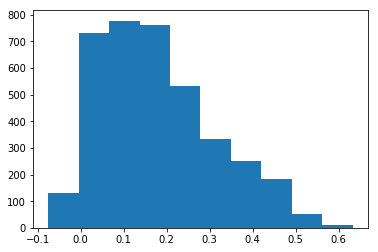

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(diss['diss_emerge'].dropna())

In [40]:
np.mean(diss['diss_emerge'].dropna())

0.17964820704640622